***
# Foundational Approaches - Regularized Linear Regression
Before entering the Bayesian paradigm, it is essential to establish a baseline using foundational frequentist techniques. In real estate valuation, where datasets often contain high dimensionality and multicollinearity, standard Ordinary Least Squares (OLS) regression can suffer from high variance.

To address this, we employ **Regularization**. Regularized models introduce a penalty term to the loss function, constraining the magnitude of the model coefficients. This effectively "shrinks" estimates to reduce overfitting and improve generalizability.

### Mathematical Formulation

We model the relationship between Living Area ($x$) and Sale Price ($y$) as linear:
$$ y = \beta_0 + \beta_1 x + \epsilon $$

We compare three approaches by minimizing different Loss Functions:

**1. Ordinary Least Squares (OLS):**
Minimizes the sum of squared residuals.
$$ \mathcal{L}_{OLS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**2. Ridge Regression (L2 Regularization):**
Adds a penalty proportional to the *square* of the coefficients. This shrinks coefficients toward zero but rarely *to* zero.
$$ \mathcal{L}_{Ridge} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 $$

**3. Lasso Regression (L1 Regularization):**
Adds a penalty proportional to the *absolute value* of the coefficients. This can shrink coefficients exactly to zero, performing feature selection.
$$ \mathcal{L}_{Lasso} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| $$

***

In [2]:
# --- Setup and Path Definition ---
import sys
from pathlib import Path

# Find the project root by looking for the .git folder
PROJECT_ROOT = Path.cwd().resolve().parents[2]

# Define key paths
DATA_PATH = PROJECT_ROOT / "src" / "data"
SRC_PATH = PROJECT_ROOT / "src"

# Add the 'src' directory to sys.path to allow for module imports
if str(SRC_PATH) not in sys.path:
    sys.path.append(str(SRC_PATH))

print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Path:    {DATA_PATH}")
# --- End of Setup ---

Project Root: /Users/Faheem/Desktop/IITH/Sem 5 Textbooks and Extras/Bayesian/Project 2
Data Path:    /Users/Faheem/Desktop/IITH/Sem 5 Textbooks and Extras/Bayesian/Project 2/src/data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(DATA_PATH / 'processed' / 'post_eda_ames_data.csv')

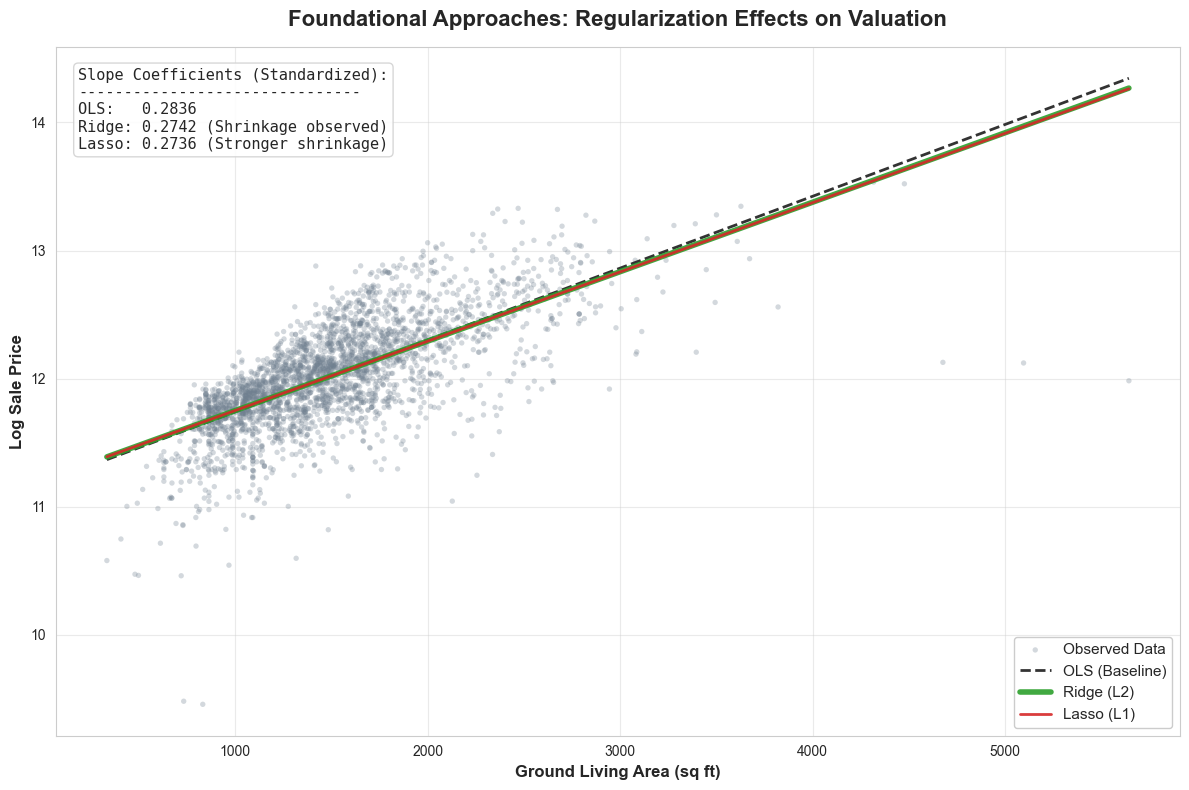

Root Mean Squared Error (OLS):   0.29267
Root Mean Squared Error (Ridge): 0.29282
Root Mean Squared Error (Lasso): 0.29284


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

# --- Data Preparation ---
# We use the Log Sale Price and Gr_Liv_Area from the dataframe
X = df[['Gr_Liv_Area']].values
y = df['Log_Sale_Price'].values

# Standardization for regularized regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Model Fitting ---
# 1. OLS (No regularization)
ols_model = LinearRegression()
ols_model.fit(X_scaled, y)

# 2. Ridge (L2) (alpha is the regularization strength)
ridge_model = Ridge(alpha=100.0) 
ridge_model.fit(X_scaled, y)

# 3. Lasso (L1)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_scaled, y)




# Create a grid for smooth plotting of lines
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_grid_scaled = scaler.transform(X_grid)

# Predictions for the grid
y_ols = ols_model.predict(X_grid_scaled)
y_ridge = ridge_model.predict(X_grid_scaled)
y_lasso = lasso_model.predict(X_grid_scaled)




plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 1. Scatter of raw data
plt.scatter(X, y, alpha=0.3, color='slategray', s=15, label='Observed Data', edgecolors='none')

# 2. Plotting the models
plt.plot(X_grid, y_ols, color='#333333', linewidth=2, linestyle='--', label=f'OLS (Baseline)')
plt.plot(X_grid, y_ridge, color='#2ca02c', linewidth=4, alpha=0.9, label=f'Ridge (L2)')
plt.plot(X_grid, y_lasso, color='#d62728', linewidth=2, alpha=0.9, label=f'Lasso (L1)')

# Annotations for coefficients
text_str = (
    f"Slope Coefficients (Standardized):\n"
    f"-------------------------------\n"
    f"OLS:   {ols_model.coef_[0]:.4f}\n"
    f"Ridge: {ridge_model.coef_[0]:.4f} (Shrinkage observed)\n"
    f"Lasso: {lasso_model.coef_[0]:.4f} (Stronger shrinkage)"
)

# Add text box
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='lightgray')
plt.text(0.02, 0.97, text_str, transform=plt.gca().transAxes, fontsize=11,
        verticalalignment='top', bbox=props, family='monospace')

# Styling
plt.title('Foundational Approaches: Regularization Effects on Valuation', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Ground Living Area (sq ft)', fontsize=12, fontweight='bold')
plt.ylabel('Log Sale Price', fontsize=12, fontweight='bold')
plt.legend(frameon=True, framealpha=1, fontsize=11, loc='lower right')
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

# Print simple metrics
print(f"Root Mean Squared Error (OLS):   {np.sqrt(mean_squared_error(y, ols_model.predict(X_scaled))):.5f}")
print(f"Root Mean Squared Error (Ridge): {np.sqrt(mean_squared_error(y, ridge_model.predict(X_scaled))):.5f}")
print(f"Root Mean Squared Error (Lasso): {np.sqrt(mean_squared_error(y, lasso_model.predict(X_scaled))):.5f}")

### Observations on Foundational Models

The plot above visually demonstrates the behavior of foundational regression techniques:

1.  **Baseline Trend:** All three models capture the strong positive correlation between living area and price. The OLS line (dashed black) represents the best fit to the training data without any constraints.
2.  **The Shrinkage Effect:** The Ridge and Lasso lines (Green and Red) have slightly lower slopes than the OLS line. This is the "shrinkage" in action. By penalizing large coefficients, these models are "dampening" the sensitivity of the price prediction to square footage.
3.  **Limitations of Point Estimates:** While these models provide a robust *average* valuation trend, they fundamentally output **point estimates**. For any given square footage, the model outputs a single price (e.g., $\$200,000$).
    *   They do not inherently tell us how *uncertain* that prediction is.
    *   They treat all neighborhoods as having the exact same relationship between size and price (Global Slope).

This limitation motivates the shift to the **Bayesian Paradigm** in the following section, where we will move from point estimates to **posterior distributions**.